
# 02 – Exploratory Data Analysis (EDA) and Simple Linear Regression

In this notebook you will:

1. Check that the required Python modules are installed.  
2. Load a CSV file into a pandas DataFrame.  
3. Select **two quantitative (numeric) variables**.  
4. Explore them using basic descriptive statistics.  
5. Visualize their relationship with a scatter plot.  
6. Fit a **simple linear regression** and plot the regression line.  
7. Compute the correlation between the two variables and get a short textual interpretation.


In [1]:
# Step 1: check and import required modules

print("Step 1: Checking required Python modules...")

required_modules = ["pandas", "numpy", "matplotlib"]
missing = []

for m in required_modules:
    try:
        __import__(m)
    except ImportError:
        missing.append(m)

if missing:
    print("\nThe following required modules are missing:")
    for m in missing:
        print("  -", m)
    print("\nPlease install them before continuing, for example:")
    print("  pip install " + " ".join(missing))
else:
    print("All required modules are available. Proceeding...")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

print("Modules successfully imported: pandas, numpy, matplotlib.")


Step 1: Checking required Python modules...
All required modules are available. Proceeding...
Modules successfully imported: pandas, numpy, matplotlib.


In [3]:
# Step 2–3: ask for the CSV file and load the data

print("Step 2: Loading the data from a CSV file.")
print("Please provide:")
print("- The name (or path) of the CSV file, including the extension (e.g. 'data.csv' or 'data/AMZN.csv').")
print("- Later you will be asked for the names of TWO quantitative columns in that file.")
print("IMPORTANT: include the file extension, e.g. '.csv'.")

df = None

while df is None:
    csv_path = input("Enter the CSV file name or path (e.g. data.csv): ").strip()
    if not csv_path:
        print("You did not enter a file name. Please try again.\n")
        continue

    try:
        df = pd.read_csv(csv_path)
    except FileNotFoundError:
        print(f"File not found: {csv_path}")
        print("Please check that:")
        print("- The file is in the current working directory OR you used the correct relative path;")
        print("- You included the correct extension, e.g. '.csv'.")
        print("Try again.\n")
        df = None
    except Exception as e:
        print(f"An unexpected error occurred while reading the file: {e}")
        print("Please fix the problem (e.g. encoding, separator) and try again.\n")
        df = None

print(f"\nData loaded successfully from: {csv_path}")
print("The first 5 rows of the dataset:")
display(df.head())

print("\nColumn names in this dataset:")
print(list(df.columns))


Step 2: Loading the data from a CSV file.
Please provide:
- The name (or path) of the CSV file, including the extension (e.g. 'data.csv' or 'data/AMZN.csv').
- Later you will be asked for the names of TWO quantitative columns in that file.
IMPORTANT: include the file extension, e.g. '.csv'.


Enter the CSV file name or path (e.g. data.csv):  AMZN.csv



Data loaded successfully from: AMZN.csv
The first 5 rows of the dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-16,1773.33,1786.24,1770.52,1777.43,1777.43,2763400
1,2019-10-17,1796.49,1798.85,1782.02,1787.48,1787.48,2647400
2,2019-10-18,1787.80,1793.98,1749.20,1757.51,1757.51,3362500
3,2019-10-21,1769.66,1785.88,1765.00,1785.66,1785.66,2130400
4,2019-10-22,1788.15,1789.78,1762.00,1765.73,1765.73,2111700



Column names in this dataset:
['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [4]:
# Step 3: choose two quantitative columns

print("Step 3: Choose TWO quantitative columns (variables) for analysis.")
print("They should represent numeric data (e.g. counts, rates, prices, etc.).")

def ask_for_column(prompt):
    while True:
        col = input(prompt).strip()
        if col in df.columns:
            return col
        print(f"Column '{col}' was not found in the dataset. Please try again.")
        print("Available columns:")
        print(list(df.columns))

col1 = ask_for_column("Enter the name of the FIRST quantitative column: ")
col2 = ask_for_column("Enter the name of the SECOND quantitative column: ")

data = df[[col1, col2]].copy()

print("\nWe will now work with the following two variables:")
print(f" - First variable:  {col1}")
print(f" - Second variable: {col2}")

# Try to convert to numeric if some values are stored as text
for c in [col1, col2]:
    if not np.issubdtype(data[c].dtype, np.number):
        print(f"Column '{c}' is not numeric. Trying to convert it to numeric (invalid values become NaN)...")
        data[c] = pd.to_numeric(data[c], errors="coerce")

print("\nBasic info for the selected columns after type conversion (if any):")
display(data.info())

print("\nFirst 10 rows of the selected variables:")
display(data.head(10))


Step 3: Choose TWO quantitative columns (variables) for analysis.
They should represent numeric data (e.g. counts, rates, prices, etc.).


Enter the name of the FIRST quantitative column:  Open
Enter the name of the SECOND quantitative column:  Close



We will now work with the following two variables:
 - First variable:  Open
 - Second variable: Close

Basic info for the selected columns after type conversion (if any):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    253 non-null    float64
 1   Close   253 non-null    float64
dtypes: float64(2)
memory usage: 4.1 KB


None


First 10 rows of the selected variables:


,Open,Close
0,1773.33,1777.43
1,1796.49,1787.48
2,1787.80,1757.51
3,1769.66,1785.66
4,1788.15,1765.73
5,1761.30,1762.17
6,1771.09,1780.78
7,1697.55,1761.33
8,1748.06,1777.08
9,1774.81,1762.71


In [5]:
# Step 4: basic descriptive statistics and correlation

print("Step 4: Descriptive statistics and correlation.")

print("\nDescriptive statistics for the two variables:")
desc_stats = data.describe()
display(desc_stats)

print("\nCorrelation matrix between the two variables:")
corr_matrix = data.corr()
display(corr_matrix)

corr_value = corr_matrix.loc[col1, col2]
print(f"\nThe Pearson correlation between '{col1}' and '{col2}' is: {corr_value:.3f}")

# Simple textual interpretation of correlation strength
abs_corr = abs(corr_value)
if abs_corr < 0.2:
    strength = "very weak or no linear relationship"
elif abs_corr < 0.4:
    strength = "weak linear relationship"
elif abs_corr < 0.6:
    strength = "moderate linear relationship"
elif abs_corr < 0.8:
    strength = "strong linear relationship"
else:
    strength = "very strong linear relationship"

direction = "positive (when one increases, the other tends to increase)" if corr_value > 0 else             "negative (when one increases, the other tends to decrease)" if corr_value < 0 else             "no clear positive or negative direction"

print(f"Interpretation: there is a {strength}, {direction}.")


Step 4: Descriptive statistics and correlation.

Descriptive statistics for the two variables:


,Open,Close
count,253.000000,253.000000
mean,2386.007194,2388.005296
std,577.490322,574.837504
min,1641.510000,1676.610000
25%,1860.000000,1862.020000
50%,2329.440000,2314.080000
75%,3022.610000,3008.870000
max,3547.000000,3531.450000



Correlation matrix between the two variables:


,Open,Close
Open,1.000000,0.996845
Close,0.996845,1.000000



The Pearson correlation between 'Open' and 'Close' is: 0.997
Interpretation: there is a very strong linear relationship, positive (when one increases, the other tends to increase).


Step 5: Scatter plot and simple linear regression.


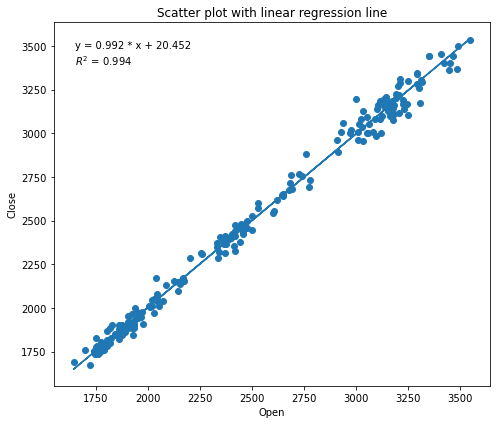

Estimated regression line: Close = 0.992 * Open + 20.452
Coefficient of determination R^2: 0.994

Interpretation tips:
- The slope tells you how much the second variable changes on average when the first variable increases by 1 unit.
- R^2 shows how much of the variation in the second variable can be explained by a linear relationship with the first.
- Always interpret these results in the historical context of your data (time period, sources, measurement practices, etc.).


In [6]:
# Step 5: scatter plot and simple linear regression

print("Step 5: Scatter plot and simple linear regression.")

# Drop rows with missing data in either column
clean = data[[col1, col2]].dropna()

x = clean[col1].values
y = clean[col2].values

if len(clean) < 2:
    print("Not enough valid data points to fit a regression line (need at least 2).")
else:
    # Fit a simple linear regression using numpy.polyfit (degree 1)
    slope, intercept = np.polyfit(x, y, 1)
    y_pred = slope * x + intercept

    # Compute R^2 (coefficient of determination)
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r_squared = 1 - ss_res / ss_tot if ss_tot != 0 else np.nan

    plt.figure(figsize=(7, 6))
    plt.scatter(x, y)
    plt.plot(x, y_pred)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title("Scatter plot with linear regression line")

    # Optionally annotate the plot with the regression equation and R^2
    eq_text = f"y = {slope:.3f} * x + {intercept:.3f}\n$R^2$ = {r_squared:.3f}"
    # Place text in the upper left corner of the plot
    plt.text(0.05, 0.95, eq_text, transform=plt.gca().transAxes,
             verticalalignment="top")

    plt.tight_layout()
    plt.show()

    print(f"Estimated regression line: {col2} = {slope:.3f} * {col1} + {intercept:.3f}")
    print(f"Coefficient of determination R^2: {r_squared:.3f}")
    print("\nInterpretation tips:")
    print("- The slope tells you how much the second variable changes on average when the first variable increases by 1 unit.")
    print("- R^2 shows how much of the variation in the second variable can be explained by a linear relationship with the first.")
    print("- Always interpret these results in the historical context of your data (time period, sources, measurement practices, etc.).")


Step 6: Histograms of both variables.


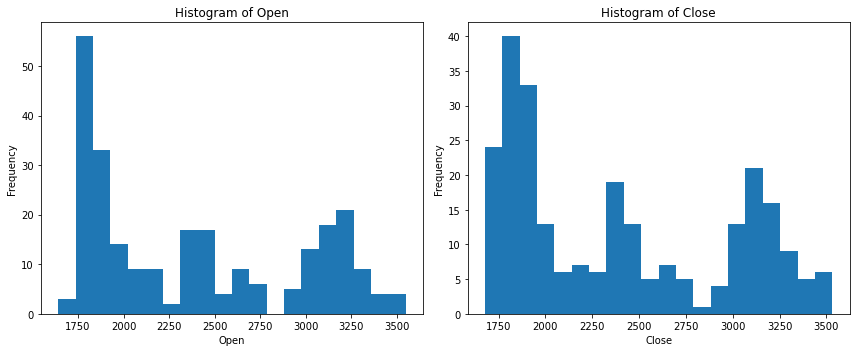

These histograms show the marginal distributions of each variable separately (shape, spread, potential outliers).


In [7]:
# Step 6: histograms of both variables (marginal distributions)

print("Step 6: Histograms of both variables.")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data[col1].dropna(), bins=20)
plt.title(f"Histogram of {col1}")
plt.xlabel(col1)
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(data[col2].dropna(), bins=20)
plt.title(f"Histogram of {col2}")
plt.xlabel(col2)
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

print("These histograms show the marginal distributions of each variable separately (shape, spread, potential outliers).")


## Summary of what this notebook did

1. **Checked required modules** (`pandas`, `numpy`, `matplotlib`).  
2. **Loaded a CSV file** chosen by you into a pandas DataFrame.  
3. **Selected two quantitative variables** that you specified by column name.  
4. **Computed descriptive statistics** (mean, standard deviation, quartiles, etc.) and the **correlation** between the two variables.  
5. **Created a scatter plot** of the two variables and fitted a **simple linear regression line** using `numpy.polyfit`.  
6. Calculated and displayed the **regression equation** and the **coefficient of determination R²**.  
7. Produced **histograms** of each variable to show their marginal distributions.  

You can adapt this notebook by:

- Using different CSV files and column names.  
- Adding more visualizations (e.g. additional scatter plots over time, log-transformed variables).  
- Connecting the numerical results with specific historical questions (for example: economic growth, demographic changes, social stratification, etc.).
